Starting ISS tracking...


/var/folders/63/qn_7pskj3cb9mdy7jqz167t00000gn/T/ipykernel_16130/3241052491.py:22: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  current_time = datetime.utcfromtimestamp(pos['timestamp']).strftime("%Y-%m-%d %H:%M:%S")


1/100 | 2025-07-05 14:49:13 UTC | lat: -51.0656 | lon: -33.4247
2/100 | 2025-07-05 14:49:24 UTC | lat: -51.1852 | lon: -32.3608
3/100 | 2025-07-05 14:49:36 UTC | lat: -51.3037 | lon: -31.1938
4/100 | 2025-07-05 14:49:47 UTC | lat: -51.4012 | lon: -30.1189
5/100 | 2025-07-05 14:49:59 UTC | lat: -51.4953 | lon: -28.9411
6/100 | 2025-07-05 14:50:11 UTC | lat: -51.5764 | lon: -27.7586
7/100 | 2025-07-05 14:50:22 UTC | lat: -51.6394 | lon: -26.6711
8/100 | 2025-07-05 14:50:33 UTC | lat: -51.6915 | lon: -25.5807
9/100 | 2025-07-05 14:50:45 UTC | lat: -51.7358 | lon: -24.3885
10/100 | 2025-07-05 14:50:57 UTC | lat: -51.7669 | lon: -23.1943
11/100 | 2025-07-05 14:51:08 UTC | lat: -51.7838 | lon: -22.0984
12/100 | 2025-07-05 14:51:19 UTC | lat: -51.7897 | lon: -21.0018
13/100 | 2025-07-05 14:51:30 UTC | lat: -51.7845 | lon: -19.9053
14/100 | 2025-07-05 14:51:41 UTC | lat: -51.7682 | lon: -18.8093
15/100 | 2025-07-05 14:51:53 UTC | lat: -51.7378 | lon: -17.6150
16/100 | 2025-07-05 14:52:05 UTC |

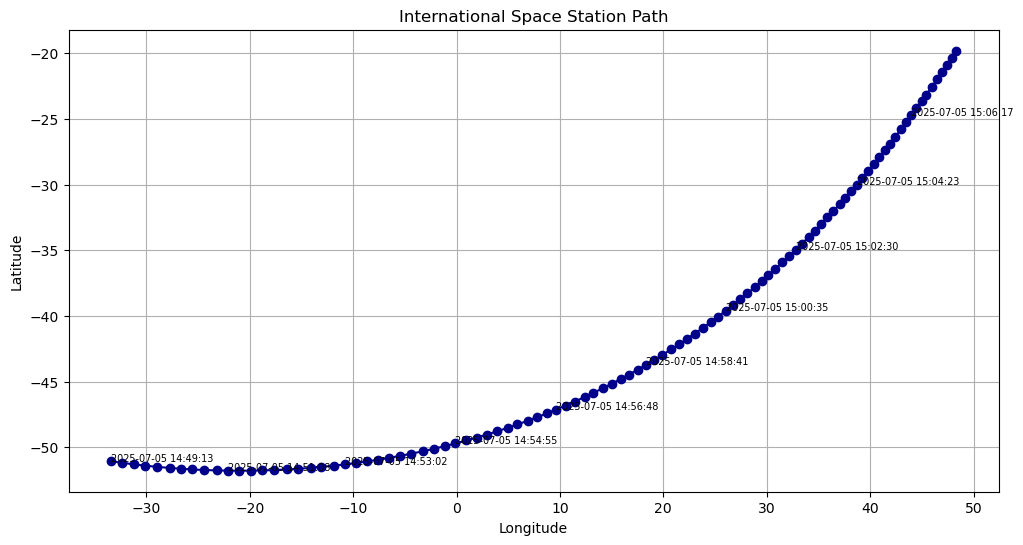

In [1]:
import requests as req
import matplotlib.pyplot as plt
import time
from datetime import datetime

iss_api = "https://api.wheretheiss.at/v1/satellites/25544"

times = []
lats = []
lons = []

total_points = 100
pause_sec = 10

print("Starting ISS tracking...")

for idx in range(total_points):
    try:
        response = req.get(iss_api)
        pos = response.json()
        
        current_time = datetime.utcfromtimestamp(pos['timestamp']).strftime("%Y-%m-%d %H:%M:%S")
        lat = pos['latitude']
        lon = pos['longitude']
        
        times.append(current_time)
        lats.append(lat)
        lons.append(lon)
        
        print(f"{idx+1}/{total_points} | {current_time} UTC | lat: {lat:.4f} | lon: {lon:.4f}")
        
    except Exception as e:
        print(f"Error on point {idx+1}: {e}")
        
    if idx < total_points - 1:
        time.sleep(pause_sec)

plt.figure(figsize=(12,6))
plt.plot(lons, lats, marker='o', linestyle='-', color='darkblue')
plt.title("International Space Station Path")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

for i in range(0, total_points, 10):
    plt.annotate(times[i], (lons[i], lats[i]), fontsize=7)

plt.show()